# Predicting Flight Delays with sklearn

In this notebook, we will be using features we've prepared in PySpark to predict flight delays via regression and classification.

In [38]:
import sys, os, re
sys.path.append("lib")
import utils

import numpy as np
import sklearn
print("Imports worked...")

Imports worked...


In [ ]:
# Load our training data using our json utils. May take a few minutes to load.
training_data = utils.read_json_lines_file('../data/simple_flight_delay_features.jsonl')
len(training_data) # 5,714,008
training_data = training_data[:500000] # 'sampling'
print("Data loaded...")

In [33]:
# Separate our results from the rest of the data, vectorize and size up
results = [record['DepDelayMinutes'] for record in training_data]
results_vector = np.array(results)
sys.getsizeof(results_vector) # 45,712,160 bytes

4000096

In [34]:
# Remove the two delay fields and the flight date from our training data
for item in training_data:
  del item['DepDelayMinutes']
  del item['ArrDelayMinutes']
  del item['FlightDate']

# Use DictVectorizer to convert feature dicts to vectors
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
training_vectors = vectorizer.fit_transform(training_data)
training_vectors.data.nbytes # 16,000,000

16000000

In [35]:
# Train a gradient boosted regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#regressor = GradientBoostingRegressor()
regressor = LinearRegression()
regressor.fit(training_vectors, results_vector)  # make sure you int() on the number string results

# Get the accuracy through cross validation
scores = sklearn.cross_validation.cross_val_score(
  regressor,
  training_vectors.toarray(),
  results_vector,
  cv=5
)
print(scores.mean())

-0.00114888729151


In [20]:
# Try that again, with our own splits
from sklearn.cross_validation import train_test_split, cross_val_predict
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
  training_vectors.toarray(),
  results_vector,
  test_size=0.10,
  random_state=43
)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

evs = explained_variance_score(y_test, predicted)
print("Explained variance score: {}".format(evs))

mae = mean_absolute_error(y_test, predicted)
print("Mean absolute error:      {}".format(mae))

medae = median_absolute_error(y_test, predicted)
print("Median absolute error:    {}".format(medae))

r2 = r2_score(y_test, predicted)
print("r2 score:                 {}".format(r2))

Explained variance score: 0.0021941940463685583
Mean absolute error:      14.925647659329544
Median absolute error:    9.67188954549838
r2 score:                 0.002102680589421313


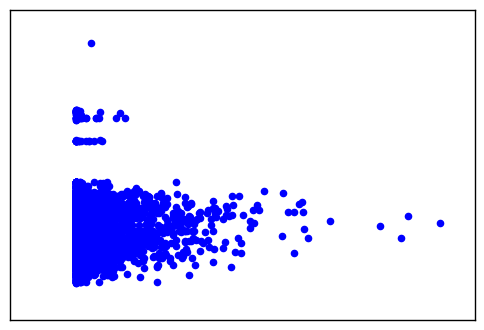

In [14]:
# Plot outputs, see how they fit
import matplotlib.pyplot as plt

#plt.scatter(X_test, y_test,  color='black')
plt.scatter(
  y_test,
  regressor.predict(X_test),
  color='blue',
  linewidth=1
)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
# Now, how would we employ our model in practice to produce predictions?
print(training_data[0])



{'FlightNum': 899, 'Carrier': 'AA', 'Origin': 'ABQ', 'Dest': 'CLT'}
